# Проект "Анализ и прогнозирование удойности и качества продукта"

**Заказчик:** Фермерское хозяйство "Вольный луг" (далее - Хозяйство).

**Цели проекта:** 
- Анализ данных о Хозяйстве с целью определения ключевых метрик, влияющих на качество продукта (вкус молока), удой коров (не менее 6000 кг./год).
- Создание модели машинного обучения (далее - МО) для прогнозирования удоя коров.
- Анализ данных о хозяйстве "ЭкоФерма" (далее - Ферма) на соответствие коров Фермы критериям Хозяйства.
- Создание модели МО для расчёта вероятности получить вкусное молоко (далее - качественный продукт).
- С помощью вышеуказанных моделей отобрать коров Фермы по двум показателям - среднему удою не менее 6000 кг./год и качественому продукту.
- Выдать заказчику рекоммендации по заключению контракта с Фермой.

# Оглавление

- [0. Подготовка ноутбука к работе](#0-Подготовка-ноутбука-к-работе)
- [1. Анализ исходных данных](#1-Анализ-исходных-данных)
  - [1.1. Данные о коровах Хозяйства](#11-Данные-о-коровах-Хозяйства)
    - [1.1.1 Первичный анализ и предобработка](#111-Первичный-анализ-и-предобработка)
    - [1.1.2 Статистический анализ](#112-Статистический-анализ)
      - [1.1.2.1 Количественные признаки](#1121-Количественные-признаки)
      - [1.1.2.2 Категориальные признаки](#1122-Категориальные-признаки)
  - [1.2. Данные о папе каждой коровы Хозяйства](#12-Данные-о-папе-каждой-коровы-Хозяйства)
    - [1.2.1 Первичный анализ и предобработка](#121-Первичный-анализ-и-предобработка)
    - [1.2.2 Статистический анализ](#122-Статистический-анализ)
  - [1.3 Данные о коровах Фермы](#13-Данные-о-коровах-Фермы)
    - [1.3.1 Первичный анализ и предобработка](#131-Первичный-анализ-и-предобработка)
    - [1.3.2 Статистический анализ](#132-Статистический-анализ)
      - [1.3.2.1 Количественные признаки](#1321-Количественные-признаки)
      - [1.3.2.2 Категориальные признаки](#1322-Категориальные-признаки)
- [2. Корреляционный анализ признаков в датасете](#2-Корреляционный-анализ-признаков-в-датасете)
  - [2.1 Взаимосвязь между признаками](#21-Взаимосвязь-между-признаками)
  - [2.2 Взаимосвязи между целевым (удой) и входными количественными признаками](#22-Взаимосвязи-между-целевым-удой-и-входными-количественными-признаками)
- [3. Создание моделей МО и предсказание удоя с помощью линейной регрессии](#3-Создание-моделей-МО-и-предсказание-удоя-с-помощью-линейной-регрессии)
  - [3.1 Модель №1](#31-Модель-№1)
  - [3.2 Модель №2](#32-Модель-№2)
  - [3.3 Модель №3](#33-Модель-№3)
  - [3.4 Сравнение метрик качества MSE, MAE, RMSE для Моделей №1,2,3.](#34-Сравнение-метрик-качества-MSE-MAE-RMSE-для-Моделей-№12-3)
  - [3.5 Прогнозирование удоя коров Фермы](#35-Прогнозирование-удоя-коров-Фермы)
- [4. Создание модели МО и предсказание качества продукта с помощью логистической регрессии](#4-Создание-модели-МО-и-предсказание-качества-продукта-с-помощью-логистической-регрессии)
  - [4.1 Подготовка модели](#41-Подготовка-модели)
  - [4.2 Анализ модели](#42-Анализ-модели)
  - [4.3 Прогнозирование вкуса молока коров](#43-Прогнозирование-вкуса-молока-коров)
- [5. Итоговые выводы и рекомендации заказчику](#5-Итоговые-выводы-и-рекомендации-заказчику)

## 0. Подготовка ноутбука к работе

In [276]:
pip install -q phik

Note: you may need to restart the kernel to use updated packages.


In [277]:
# Импортирование библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

import phik

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_error, 
                             accuracy_score, 
                             recall_score, 
                             precision_score, 
                             confusion_matrix)

In [278]:
# Настройка параметров отображения данных
pd.options.display.float_format = '{:,.2f}'.format
# Предупреждения
import warnings
warnings.filterwarnings("ignore")

In [279]:
# Загрузка данных

# актуальные данные о коровах Хозяйства
current = pd.read_csv('https://ferma_main.csv', sep=';')
# данные о папе каждой коровы Хозяйства
father_info = pd.read_csv('https://ferma_dad.csv', sep=';')
# данные о коровах Фермы
eco_farm = pd.read_csv('https://cow_buy.csv', sep=';')

In [280]:
# Функция для вывода основной информации
def main_info (df):
    """
    Displays basic information about the DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None
    """

    print("\nDataFrame Shape:")
    print(f"\nЧисло наблюдений: {df.shape[0]}")
    print(f"\nЧисло признаков: {df.shape[1]}")

    print("\nDataFrame Info:")
    display(df.info())

    print("DataFrame Head:")
    display(df.head())

    print("Percentage of Missing values:")
    display(df.isna().mean().sort_values(ascending=False))

    print("Duplicates:")
    display(df.duplicated().sum())
    return None


In [281]:
# Функция для обработки пробелов в начале/конце строковых значений
def lead_trail_space_remover(df):
    """
    Iterates through a column in a dataframe and removes leading/trailing spaces in strings.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None
    """
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.strip()
    return None

In [282]:
# Функция для преобразования строковых данных в числовые
def string_to_float(df, columns_to_convert):
    """
    Converts string representations of numeric values in specified columns of a DataFrame to float data type.

    Parameters:
    - df: pandas DataFrame
    - columns_to_convert: list of strings.

    Returns:
    None. Modifies the DataFrame 'df' in place.
    """
    for column in columns_to_convert:
        df[column] = df[column].str.replace(',', '.').astype(float)

In [283]:
# Функция для выделения числовых значений датафрейма
def numeric(df):
    """
    Identifies numeric columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    A list of column names containing numeric data types.
    """
    columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
    return columns

In [284]:
# Функция для выделения не числовых значений датафрейма
def non_numeric(df):
    """
    Identifies non-numeric columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    A list of column names containing non-numeric data types.
    """
    columns = [col for col in df.columns if df[col].dtype == 'object']
    return columns

In [285]:
# Функция для построения диаграмм распределения количественных признаков
def plot_density_and_boxplot(data, column):
    """
    Plot density plot and boxplot for a given column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column: str

    Returns:
    - None
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot density plot
    sns.histplot(data[column], bins=50, color='lightgreen', kde=True, ax=axs[0])
    axs[0].set_title(f'Density Plot of {column}')

    # Plot boxplot
    axs[1].boxplot(data[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[1].set_title(f'Boxplot of {column}')

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

In [286]:
# Функция для построения круговой диаграммы категориальных данных
def plot_pie_chart(df, column):
    """
    Plot a pie chart to visualize the distribution of categorical data in the specified column of the DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column: str

    Returns:
    - None
    """
    # Group by the specified column and calculate counts and ratios
    data = df.groupby(column)[column].agg(count=('count'))
    data['ratio (%)'] = round(data['count'] / len(df) * 100)

    # Extract labels and sizes
    labels = data.index
    sizes = data['ratio (%)']

    # Plot the pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'{column} ratio')
    plt.show()

In [287]:
# Функция для рассчёта метрик качества моделей МО (линейная регрессия)
def errors(y_true, y_pred):
    """
    Calculates and prints the values of three error metrics: MSE, MAE, and RMSE.

    Parameters:
        y_true (array-like): Actual values of the target feature.
        y_pred (array-like): Predicted values of the target feature.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred) 
    
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")

## 1. Анализ исходных данных</h2>

### 1.1. Данные о коровах Хозяйства</h2>

#### 1.1.1 Первичный анализ и предобработка

In [288]:
# Обработка возможных пробелов
lead_trail_space_remover(current)

In [289]:
# Обзор общей информации о коровах Хозяйства
main_info(current)


DataFrame Shape:

Число наблюдений: 634

Число признаков: 12

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус мо

None

DataFrame Head:


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


Percentage of Missing values:


id                                      0.00
Удой, кг                                0.00
ЭКЕ (Энергетическая кормовая единица)   0.00
Сырой протеин, г                        0.00
СПО (Сахаро-протеиновое соотношение)    0.00
Порода                                  0.00
Тип пастбища                            0.00
порода папы_быка                        0.00
Жирность,%                              0.00
Белок,%                                 0.00
Вкус молока                             0.00
Возраст                                 0.00
dtype: float64

Duplicates:


5

1. Названия столбцов необходимо привести к более читаемому виду.
2. Некоторые типы данных указаны не корректно (строка вместо числа), также вместо точки стоит запятая.
3. Пропущенных значений не обнаружено.
4. Есть строки-дубликаты, которые необходимо удалить.

In [290]:
# Приведение названий столбцов к удобному виду

new_column_names = {
    'id': 'ID', 
    'Удой, кг': 'milk_yield_kg', 
    'ЭКЕ (Энергетическая кормовая единица)': 'EKE',
    'Сырой протеин, г': 'raw_protein_g', 
    'СПО (Сахаро-протеиновое соотношение)': 'SPO',
    'Порода': 'breed',
    'Тип пастбища': 'grazing_type',
    'порода папы_быка': 'father_breed',
    'Жирность,%': 'fat_percentage',
    'Белок,%': 'protein_percentage',
    'Вкус молока': 'taste',
    'Возраст': 'age'
}

current = current.rename(columns=new_column_names)

current.columns

Index(['ID', 'milk_yield_kg', 'EKE', 'raw_protein_g', 'SPO', 'breed',
       'grazing_type', 'father_breed', 'fat_percentage', 'protein_percentage',
       'taste', 'age'],
      dtype='object')

In [291]:
# Корректировка типов
columns_to_convert = ['EKE', 'SPO', 'fat_percentage', 'protein_percentage']
string_to_float(current, columns_to_convert)

In [292]:
# Проверка корректности типов данных
current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  634 non-null    int64  
 1   milk_yield_kg       634 non-null    int64  
 2   EKE                 634 non-null    float64
 3   raw_protein_g       634 non-null    int64  
 4   SPO                 634 non-null    float64
 5   breed               634 non-null    object 
 6   grazing_type        634 non-null    object 
 7   father_breed        634 non-null    object 
 8   fat_percentage      634 non-null    float64
 9   protein_percentage  634 non-null    float64
 10  taste               634 non-null    object 
 11  age                 634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [293]:
# Устранение полных дубликатов  
current = current.drop_duplicates().reset_index(drop=True)
current.duplicated().sum()

0

In [294]:
# Проверка отсутствия дубликатов в primary key
current['ID'].duplicated().sum()

0

In [295]:
# Анализ числовых значений
current[numeric(current)].describe()

,ID,milk_yield_kg,EKE,raw_protein_g,SPO,fat_percentage,protein_percentage
count,629.00,629.00,629.00,629.00,629.00,629.00,629.00
mean,315.00,"6,188.75",14.54,"1,923.36",0.91,3.60,3.08
std,181.72,"1,644.80",1.31,182.96,0.03,0.17,0.00
min,1.00,"5,204.00",10.90,"1,660.00",0.84,2.99,3.07
25%,158.00,"5,751.00",13.50,"1,771.00",0.89,3.59,3.07
50%,315.00,"6,133.00",14.70,"1,888.00",0.93,3.65,3.08
75%,472.00,"6,501.00",15.60,"2,062.00",0.94,3.72,3.08
max,629.00,"45,616.00",16.80,"2,349.00",0.96,3.75,3.08


- Среднее удойности больше медианы на 55 кг и большое стандартное отклонение. Скорее всего это из-за аномального большого максимального значения.
- Нет никакого разброса в данных о содержании белков в молоке - отклонение 0.
- Остальные данные судя по всему распределены более или менее симметрично.

In [296]:
current.groupby('age')['EKE'].describe().T

age,более_2_лет,менее_2_лет
count,519.00,110.00
mean,14.87,12.98
std,1.14,0.83
min,11.50,10.90
25%,14.10,12.40
50%,15.00,12.90
75%,15.70,13.40
max,16.80,15.60


- Здесь можно увидеть, что в среднем коровам старше 2-х лет дают корм с более высоким содержанием ЕКЕ.

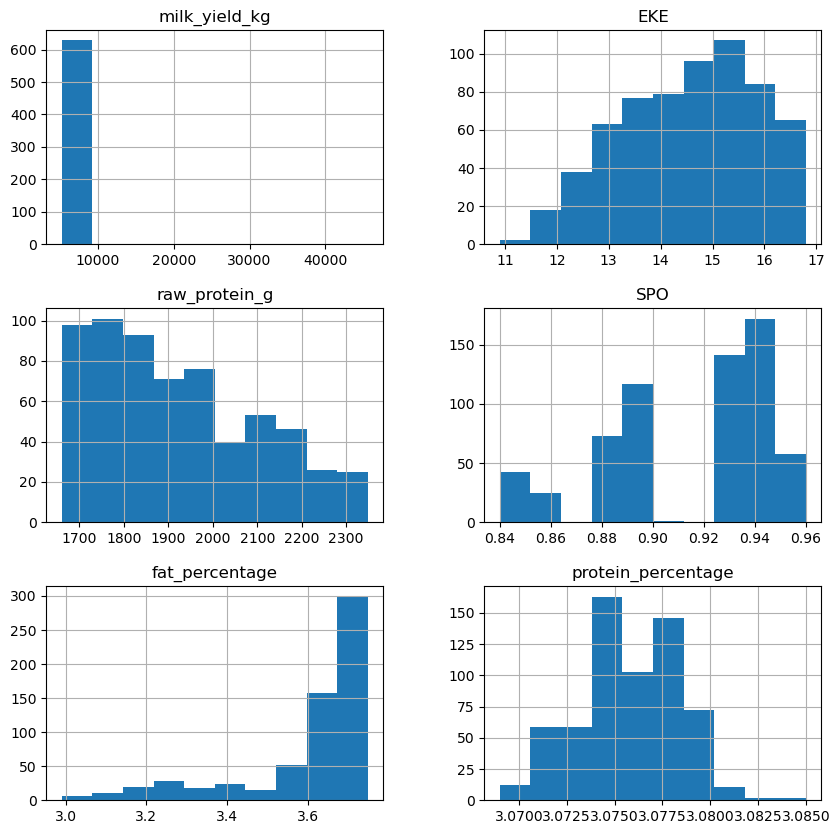

In [297]:
# Предварительный анализ распределений
current[numeric(current)].drop('ID',axis=1).hist(figsize=(10,10));

- В данных нет ни одного признака с нормальным распределением.
- Обработка выбросов и более детальный анализ данных представлен в разделе 1.1.2.

In [298]:
# Проверка не числовых значений
for col in non_numeric(current):
    print(col, current[col].unique())

breed ['Вис Бик Айдиал' 'РефлешнСоверинг']
grazing_type ['Равнинное' 'Равнинные' 'Холмистое']
father_breed ['Айдиал' 'Соверин' 'Айдиалл']
taste ['вкусно' 'не вкусно']
age ['более_2_лет' 'менее_2_лет']


In [299]:
# Устранение дубликатов
current['breed'] = current['breed'].replace({'Вис Бик Айдиал': 'Айдиал', 
                                             'РефлешнСоверинг': 'Соверин'}
                                             )
current['grazing_type'] = current['grazing_type'].replace('Равнинные', 'Равнинное')
current['father_breed'] = current['father_breed'].replace('Айдиалл', 'Айдиал')

In [300]:
current['breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [301]:
current['grazing_type'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [302]:
current['father_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [303]:
# Итоговый датафрейм
current.head()

,ID,milk_yield_kg,EKE,raw_protein_g,SPO,breed,grazing_type,father_breed,fat_percentage,protein_percentage,taste,age
0,1,5863,14.20,1743,0.89,Айдиал,Равнинное,Айдиал,3.58,3.08,вкусно,более_2_лет
1,2,5529,12.80,2138,0.89,Айдиал,Равнинное,Соверин,3.54,3.08,вкусно,менее_2_лет
2,3,5810,14.00,1854,0.89,Соверин,Холмистое,Соверин,3.59,3.07,не вкусно,более_2_лет
3,4,5895,12.40,2012,0.89,Соверин,Холмистое,Айдиал,3.40,3.08,не вкусно,более_2_лет
4,5,5302,12.80,1675,0.89,Айдиал,Равнинное,Соверин,3.73,3.07,вкусно,менее_2_лет


- В некоторых случаях порода коровы и папы быка не совпадают. Это может указывать на то, что было произведено скрещивание между коровой породы Соверин и быком породы Айдиал.

#### 1.1.2 Cтатистический анализ

##### 1.1.2.1 Количественные признаки

In [304]:
# Количественные признаки
num_columns_current = numeric(current)
num_columns_current.remove('ID')
current[num_columns_current].describe()

,milk_yield_kg,EKE,raw_protein_g,SPO,fat_percentage,protein_percentage
count,629.00,629.00,629.00,629.00,629.00,629.00
mean,"6,188.75",14.54,"1,923.36",0.91,3.60,3.08
std,"1,644.80",1.31,182.96,0.03,0.17,0.00
min,"5,204.00",10.90,"1,660.00",0.84,2.99,3.07
25%,"5,751.00",13.50,"1,771.00",0.89,3.59,3.07
50%,"6,133.00",14.70,"1,888.00",0.93,3.65,3.08
75%,"6,501.00",15.60,"2,062.00",0.94,3.72,3.08
max,"45,616.00",16.80,"2,349.00",0.96,3.75,3.08


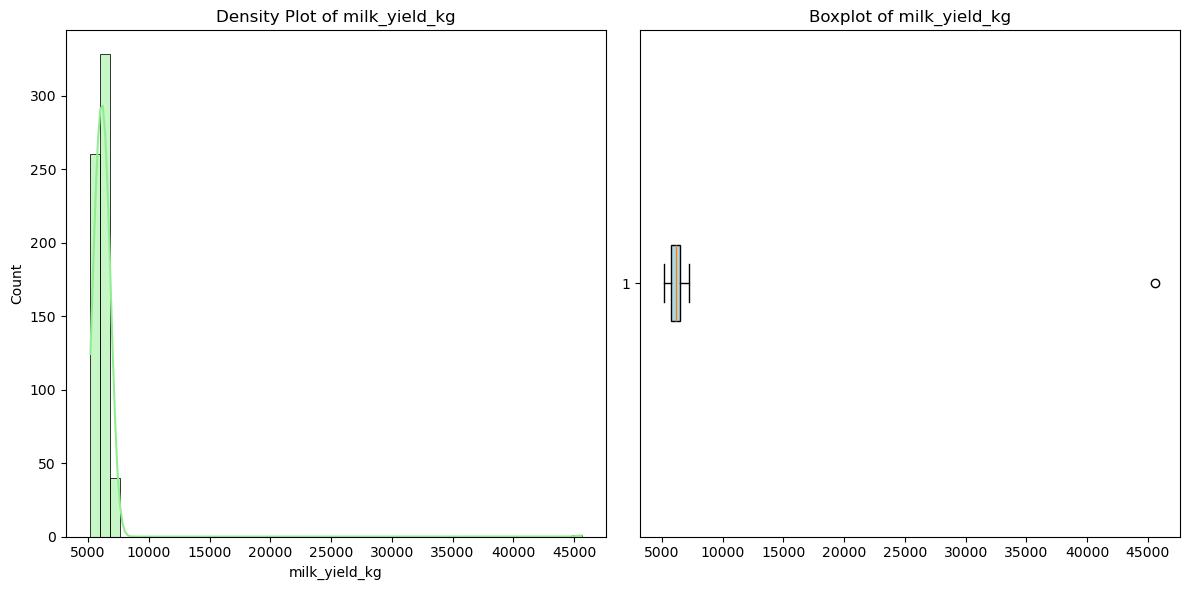

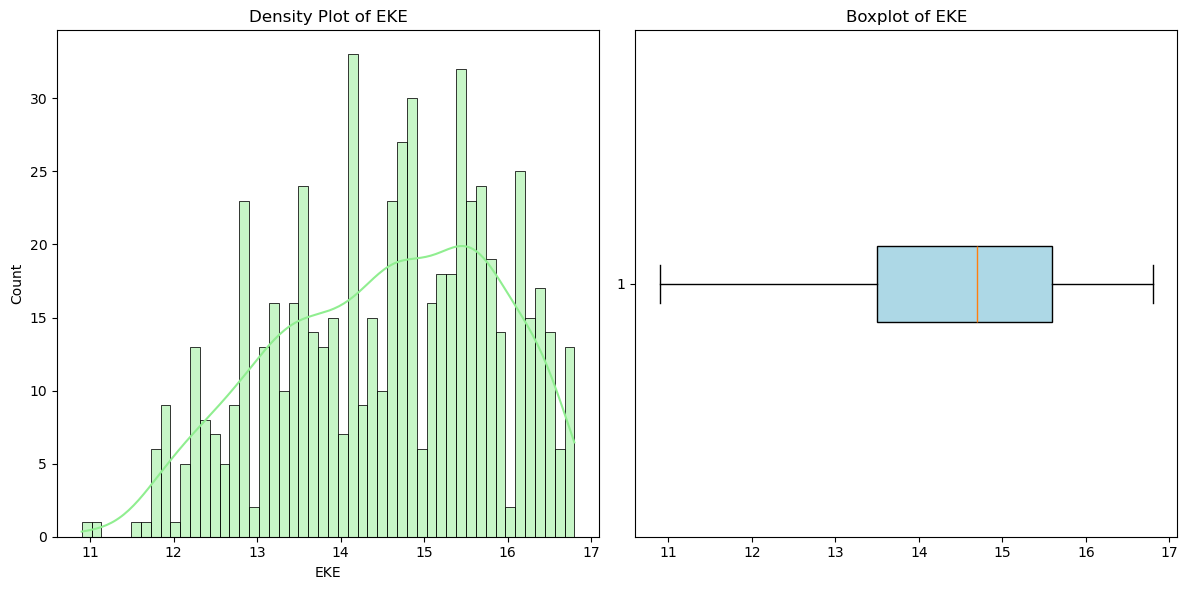

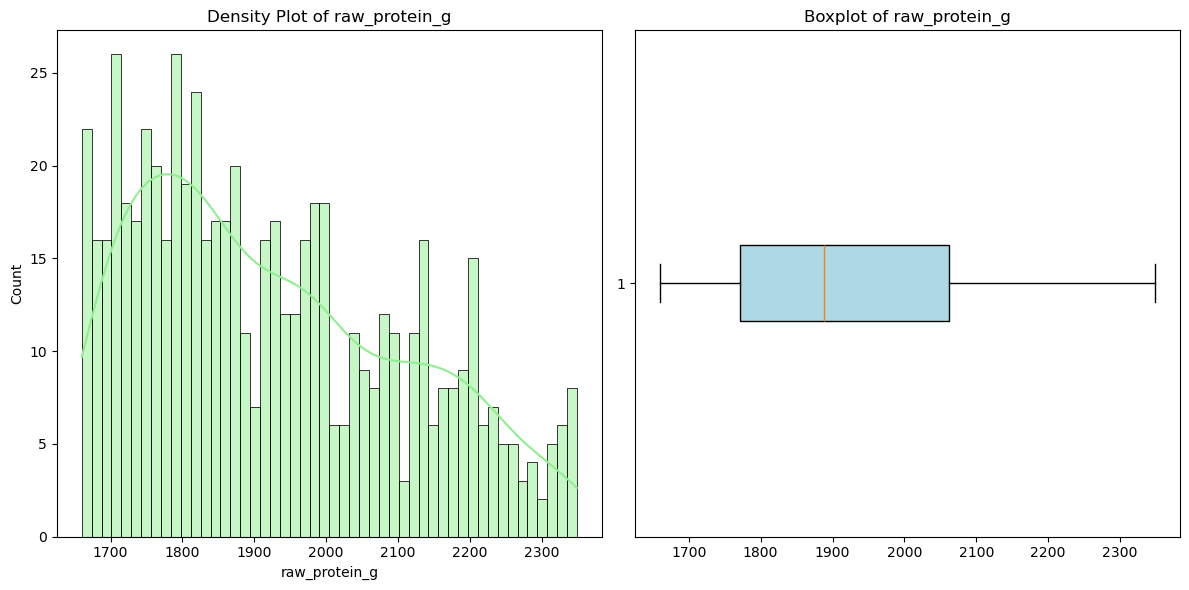

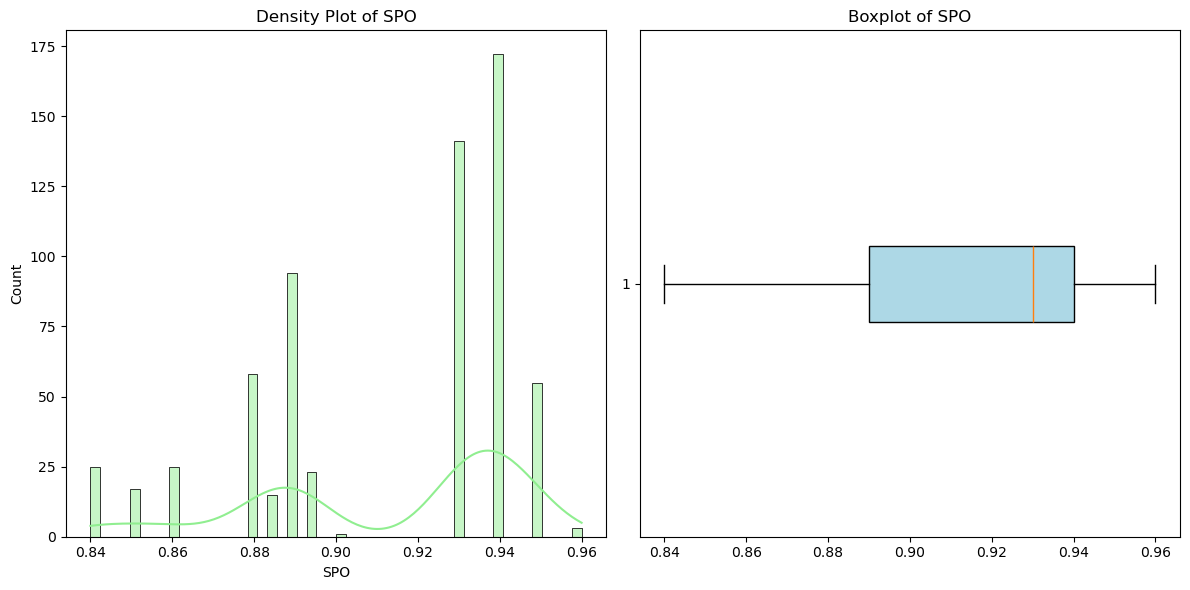

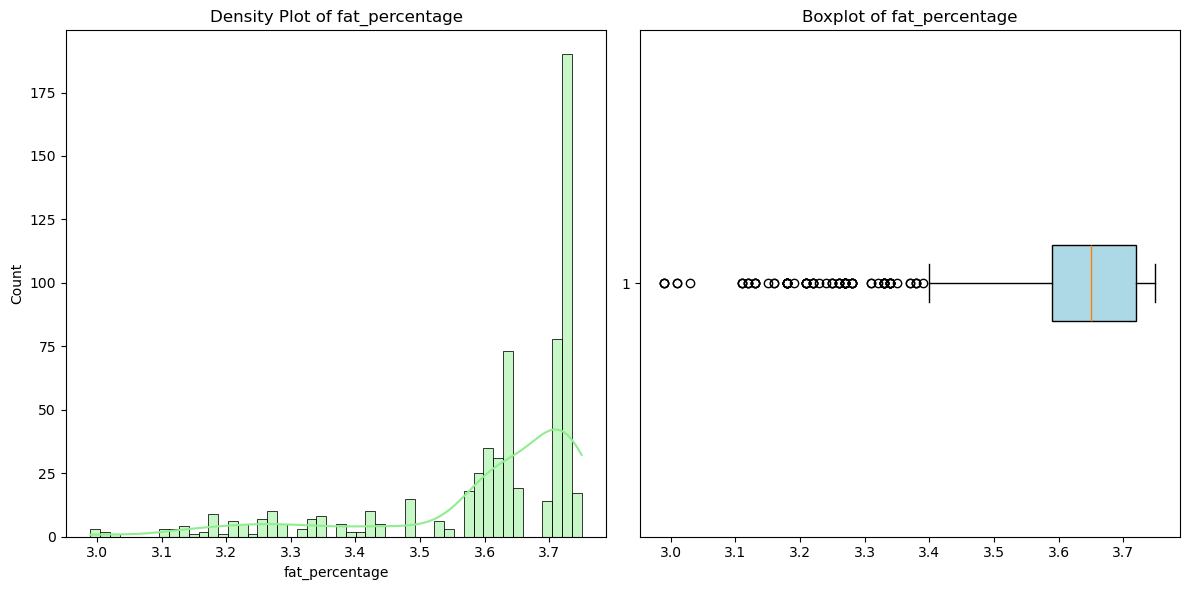

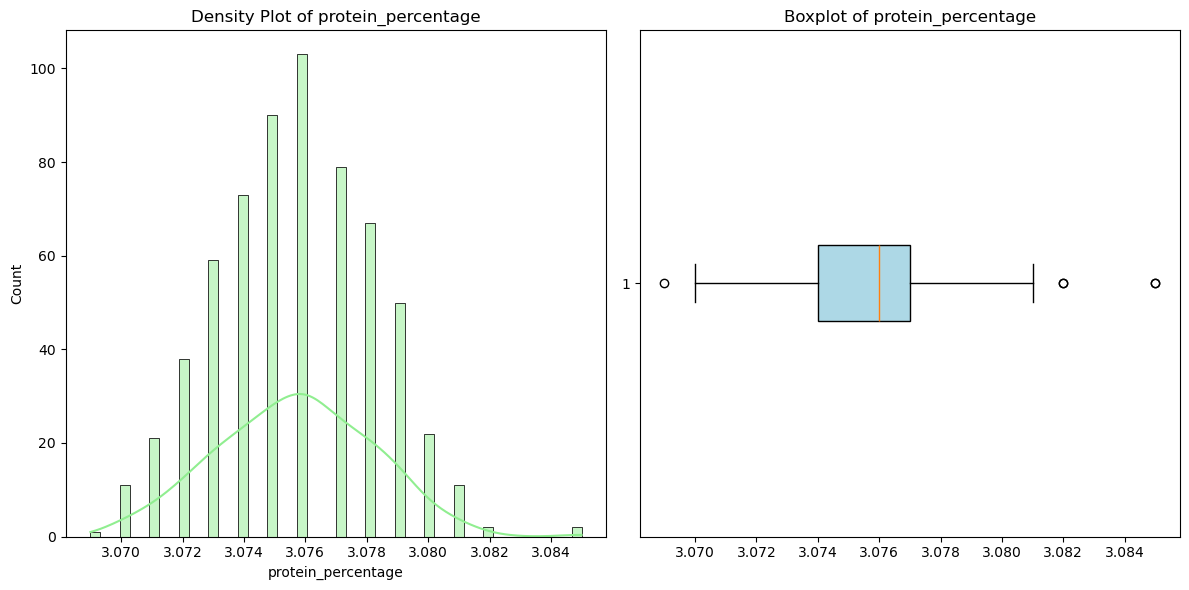

In [305]:
# Анализ распределений
for column in current[num_columns_current]:
    plot_density_and_boxplot(current, column)

1. Есть явные выбросы в данных по удою, жирности, содержанию протеина в молоке.
2. По распределению показателя сахаро-протеинового отношения можно выделить три группы: 0.84 - 0.86, 0.88 - 0.90, 0.93-0.96. Причем больше всего подмножество коров, которые получали корм с высоким сахара-протеиновым соотношением. Вероятно, стоит перевести этот признак из числового в категориальный при настройке моделей МО.
3. Содержание протеина в молоке распределено симметрично.

**Вывод:** необходимо устранить выбросы, т.к. они негативно влияют на  точность модели - возрастает ошибка предсказания.

In [306]:
# Устраним выброс в целевом признаке - удойности
current = current[current['milk_yield_kg'] < 45000]
current['milk_yield_kg'].describe()

count     628.00
mean    6,125.97
std       475.86
min     5,204.00
25%     5,749.75
50%     6,132.50
75%     6,501.00
max     7,222.00
Name: milk_yield_kg, dtype: float64

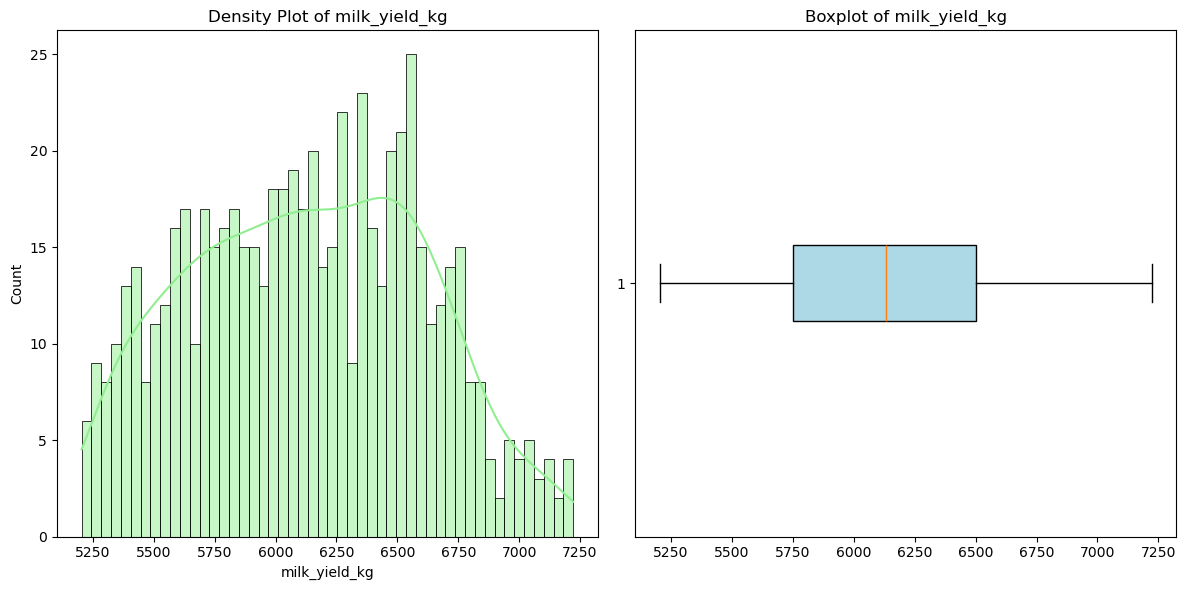

In [307]:
# Проверка распределения
plot_density_and_boxplot(current, 'milk_yield_kg')

- Теперь распределение целевого признака похоже на нормальное. 
- На данный момент средний удой коров Хозяйства составляет 6,125.97 (+- 475.86), результат, которого Заказчик хочет придерживаться в дальнейшем.

In [308]:
# Возможно самое минимальное значение на графике EKE - это аномалия. Проверим
current[current['EKE'] < 12].shape[0]/len(current) * 100

2.8662420382165608

- Данные всего 2.9% от всего датасета.

In [309]:
# Посмотрим на невысокие значения в показатели жирности.
current[current['fat_percentage'] < 3.4].shape[0]/len(current)

0.13694267515923567

- Составляют 13.5 % датасета.

In [310]:
# Посмотрим на выбросы в показателях содержания протеина в молоке
current[current['protein_percentage'] < 3.07].shape[0]

1

In [311]:
current[current['protein_percentage'] > 3.082].shape[0]

2

Оставим все вышеуказанные цифры в данных. Не обладая специальными знаниями в части животноводства удалять какие-то очень специфичные цифры не стоит.

In [312]:
# Итоговая статистика по количественным признакам
current[num_columns_current].describe()

,milk_yield_kg,EKE,raw_protein_g,SPO,fat_percentage,protein_percentage
count,628.00,628.00,628.00,628.00,628.00,628.00
mean,"6,125.97",14.55,"1,923.76",0.91,3.60,3.08
std,475.86,1.30,182.83,0.03,0.17,0.00
min,"5,204.00",10.90,"1,660.00",0.84,2.99,3.07
25%,"5,749.75",13.50,"1,771.75",0.89,3.59,3.07
50%,"6,132.50",14.70,"1,888.00",0.93,3.65,3.08
75%,"6,501.00",15.60,"2,062.25",0.94,3.72,3.08
max,"7,222.00",16.80,"2,349.00",0.96,3.75,3.08


- Выбросы устранены.
- Данные распределены боле или менее равномерно. Дисперсия не высокая.
- Корреляция признаков рассмотрена в разделе 1.4.

##### 1.1.2.2 Категориальные признаки

In [313]:
# Категориальные признаки
current[non_numeric(current)].head()

,breed,grazing_type,father_breed,taste,age
0,Айдиал,Равнинное,Айдиал,вкусно,более_2_лет
1,Айдиал,Равнинное,Соверин,вкусно,менее_2_лет
2,Соверин,Холмистое,Соверин,не вкусно,более_2_лет
3,Соверин,Холмистое,Айдиал,не вкусно,более_2_лет
4,Айдиал,Равнинное,Соверин,вкусно,менее_2_лет


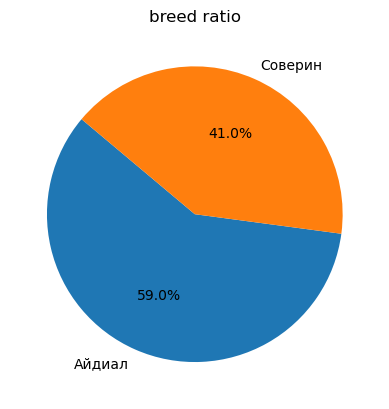

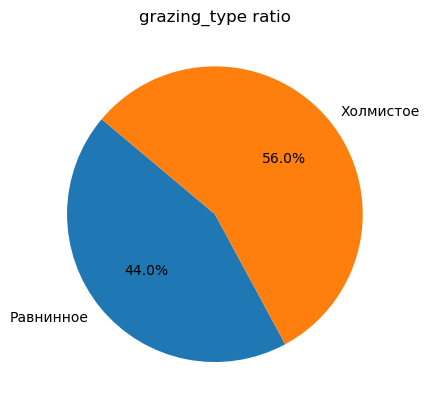

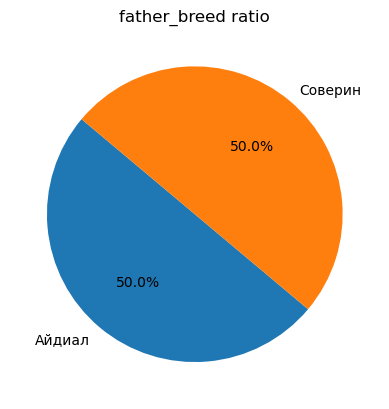

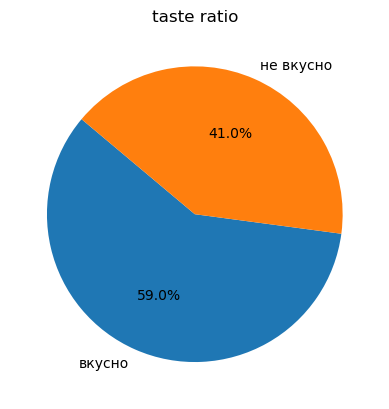

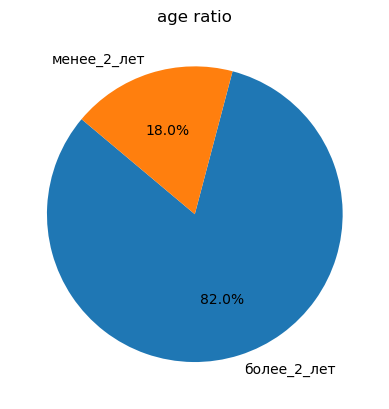

In [314]:
# Визуализация соотношения категориальных признаков
non_num_columns_current = non_numeric(current)
for column in current[non_num_columns_current]:
    plot_pie_chart(current, column)

- Большинство коров Хозяйства возрастом более 2-х лет.
- Породы быков Айдиал и Соверин распределены примерно одинаково, но коров породы Айдиал больше на 20 процентных пунктов.
- Коровы паслись на холмистых пастбищах немного чаще, чем на равнинных.
- Корреляция всех признаков рассмотрена в разделе 1.4.

**NB:** - Наблюдается **дисбаланс** классов у целевого признака (**вкус**). Доля вкусного молока, производимого на Ферме больше (59 %). Это может сказаться на производительности модели, поэтому необходимо особое внимание уделить таким метрикам качества модели, как precision, recall, матрица ошибок.

### 1.2. Данные о папе каждой коровы Хозяйства

#### 1.2.1 Первичный анализ и предобработка

In [315]:
# Обработка возможных пробелов
lead_trail_space_remover(father_info)

In [316]:
# Общая информация 
main_info(father_info)


DataFrame Shape:

Число наблюдений: 629

Число признаков: 2

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

DataFrame Head:


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Percentage of Missing values:


id         0.00
Имя Папы   0.00
dtype: float64

Duplicates:


0

1. Названия столбцов необходимо привести к более читаемому виду.
2. Типы данных указаны корректно.
3. Пропущенных значений не обнаружено.
4. Строк дубликатов нет.

In [317]:
# Приведение названий столбцов к удобному виду

new_column_names = {
    'id': 'ID', 
    'Имя Папы': 'father_name',
}

father_info = father_info.rename(columns=new_column_names)

father_info.columns

Index(['ID', 'father_name'], dtype='object')

In [318]:
# Дубликаты primary key
father_info['ID'].duplicated().sum()

0

In [319]:
# Проверка значений
father_info['father_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [320]:
# Итоговая таблица
father_info.head()

,ID,father_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


#### 1.2.2 Cтатистический анализ

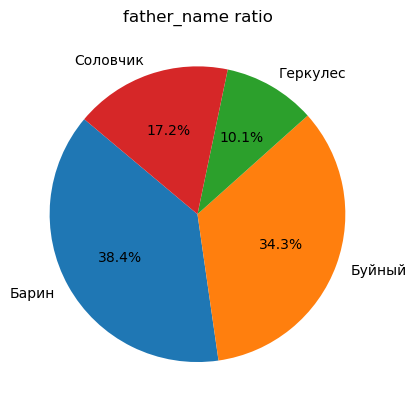

In [321]:
# Круговая диаграмма имён быков 
plot_pie_chart(father_info, 'father_name')

- Самым активный бык-осеменитель - Барин.
- На втором месте - Буйный.
- Быки Соловчик и Геркулес дали меньше потомства. 
- Однако, нам не известно за какой период представлены данные, возможно Соловчик и Геркулес были куплены позже.

### 1.3 Данные о коровах Фермы

#### 1.3.1 Первичный анализ и предобработка

In [322]:
# Обработка возможных пробелов
lead_trail_space_remover(eco_farm)

In [323]:
# Общая информация 
main_info(eco_farm)


DataFrame Shape:

Число наблюдений: 20

Число признаков: 7

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

DataFrame Head:


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Percentage of Missing values:


Порода                    0.00
Тип пастбища              0.00
порода папы_быка          0.00
Имя_папы                  0.00
Текущая_жирность,%        0.00
Текущий_уровень_белок,%   0.00
Возраст                   0.00
dtype: float64

Duplicates:


4

1. Названия столбцов необходимо привести к более читаемому виду.
2. Некоторые типы данных указаны не корректно (строка вместо числа), также вместо точки стоит запятая.
3. Пропущенных значений не обнаружено.
4. Есть строки-дубликаты. Однако, данные представляют собой тестовую выборку (данные для предсказаний), т.е. эти данные поступают на вход обученной модели, и на их основании должны быть сделаны прогнозы.

In [324]:
# Корректировка названий столбцов

new_column_names = {
    'Порода': 'breed',
    'Тип пастбища': 'grazing_type',
    'порода папы_быка': 'father_breed',
    'Имя_папы': 'father_name',
    'Текущая_жирность,%' : 'fat_percentage',
    'Текущий_уровень_белок,%': 'protein_percentage',
    'Возраст': 'age'
}

eco_farm = eco_farm.rename(columns=new_column_names)

eco_farm.columns

Index(['breed', 'grazing_type', 'father_breed', 'father_name',
       'fat_percentage', 'protein_percentage', 'age'],
      dtype='object')

In [325]:
# Корректировка типов
columns_to_convert = ['fat_percentage', 'protein_percentage']
string_to_float(eco_farm, columns_to_convert)

eco_farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   breed               20 non-null     object 
 1   grazing_type        20 non-null     object 
 2   father_breed        20 non-null     object 
 3   father_name         20 non-null     object 
 4   fat_percentage      20 non-null     float64
 5   protein_percentage  20 non-null     float64
 6   age                 20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [326]:
# Количественные признаки
eco_farm[numeric(eco_farm)].describe()

,fat_percentage,protein_percentage
count,20.00,20.00
mean,3.58,3.07
std,0.13,0.01
min,3.34,3.05
25%,3.51,3.06
50%,3.59,3.07
75%,3.65,3.08
max,3.77,3.08


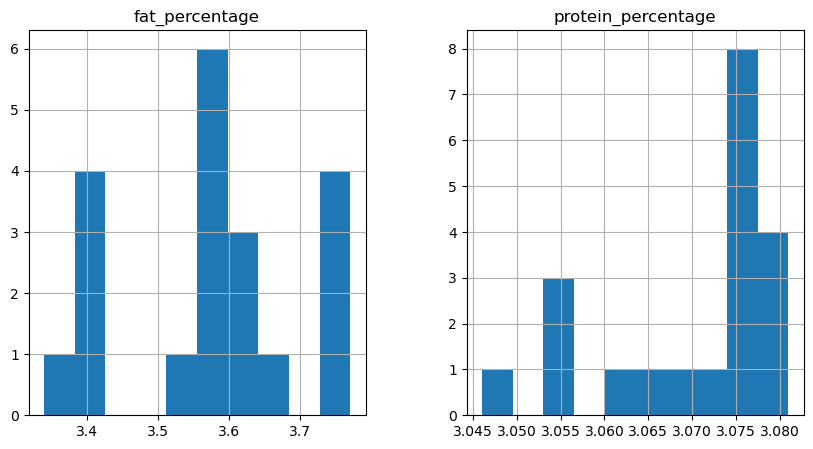

In [327]:
# Первичный анализ распределений
eco_farm[numeric(eco_farm)].hist(figsize=(10,5));

- Распределения не похожи на нормальные, скорее всего данных не достаточно.
- Анализ также представлен в разделе 1.1.2.

In [328]:
# Категориальные признаки
for col in non_numeric(eco_farm):
    print(col, eco_farm[col].unique())

breed ['Вис Бик Айдиал' 'РефлешнСоверинг']
grazing_type ['холмистое' 'равнинное']
father_breed ['Айдиал' 'Соверин']
father_name ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
age ['более_2_лет' 'менее_2_лет']


In [329]:
# Корректировка названий породы
eco_farm['breed'] = eco_farm['breed'].replace({'Вис Бик Айдиал': 'Айдиал',
                                               'РефлешнСоверинг': 'Соверин'}
                                               )
eco_farm['breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [330]:
# Корректировка типа пастбищ
eco_farm['grazing_type'] = eco_farm['grazing_type'].replace({'холмистое': 'Холмистое',
                                                            'равнинное': 'Равнинное'}
                                                            )
eco_farm['grazing_type'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [331]:
# Итоговый датафрейм
eco_farm.head()

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет
2,Соверин,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет


#### 1.3.2 Статистический анализ

##### 1.3.2.1 Количественные признаки

In [332]:
# Статистические показатели
eco_farm[numeric(eco_farm)].describe()

,fat_percentage,protein_percentage
count,20.00,20.00
mean,3.58,3.07
std,0.13,0.01
min,3.34,3.05
25%,3.51,3.06
50%,3.59,3.07
75%,3.65,3.08
max,3.77,3.08


- Наблюдений немного (16), поэтому остановимся на анализе таблицы.
- Средний показатель жирности коров Фермы - 3.57, что немного меньше среднего Хозяйства (3.6).
- Средний уровень протеина в молоке коров Фермы 3.07, что немного меньше среднего Хозяйства (3.08).
- В целом распределение этих показателей для Фермы похоже на распределение таких же признаков для Хозяйства.

##### 1.3.2.2 Категориальные признаки

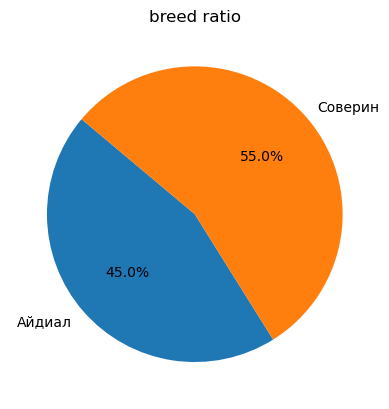

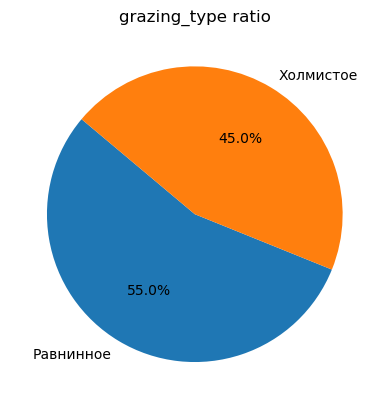

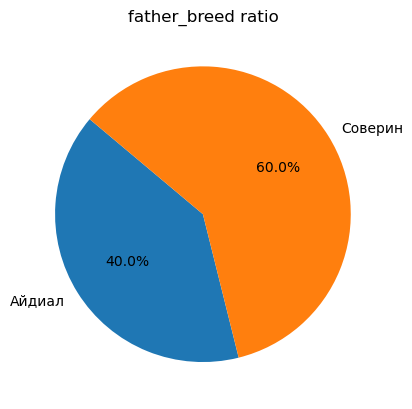

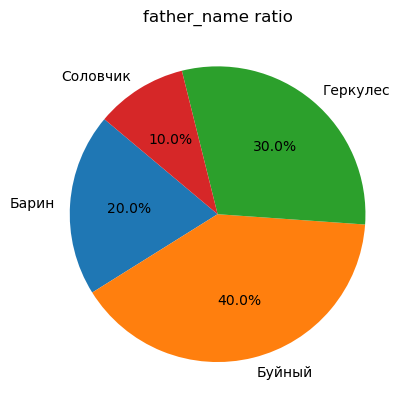

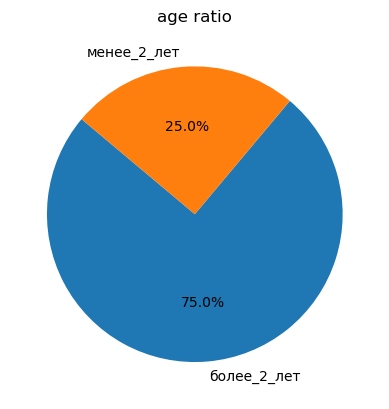

In [333]:
# Процентное соотношение
columns = non_numeric(eco_farm)
for column in eco_farm[columns]:
    plot_pie_chart(eco_farm, column)

- Большинство коров Фермы возрастом более 2-х лет.
- Число коров подоры Айдиал и Соверин примерно одинаковое, но быков породы Соверин больще на 24 процентных пункта.
- Коровы паслись на холмистых пастбищах и на равнинных одинаково.
- Корреляция всех признаков рассмотрена в разделе 1.4.
- Большинство коров - потомство быка Буйный.

**Выводы по разделу:**

- Присутствует явная бимодальность в данных. Т.е. надо углублять в анализы подгрупп, прежде чем делать какие-то выводы.

- Обнаружен супервыброс по удою. Остальные точки на "ящиках с усами" - можно считать приемлемыми значениями на данном этапе. Дадьнейшие шаги при необходимости будут произведены при моделировании (при выполннении анализа остатков).

- Признаки СПО и жирность возможно лучше перевести в категориальную шкалу, т.к. есть большая ассиметрия.

## 2. Корреляционный анализ признаков в датасете 

### 2.1 Взаимосвязь между признаками

In [334]:
# Матрица корреляции всех признаков
matrix = current.drop('ID', axis=1)
matrix = matrix.phik_matrix(interval_cols=['milk_yield_kg', 'EKE', 'raw_protein_g', 'SPO', 'fat_percentage', 'protein_percentage'])
matrix

,milk_yield_kg,EKE,raw_protein_g,SPO,breed,grazing_type,father_breed,fat_percentage,protein_percentage,taste,age
milk_yield_kg,1.00,0.72,0.46,0.66,0.16,0.28,0.52,0.71,0.06,0.17,1.00
EKE,0.72,1.00,0.46,0.59,0.12,0.11,0.17,0.72,0.00,0.27,0.77
raw_protein_g,0.46,0.46,1.00,0.39,0.09,0.10,0.00,0.40,0.20,0.18,0.35
SPO,0.66,0.59,0.39,1.00,0.06,0.16,0.43,0.65,0.07,0.57,0.74
breed,0.16,0.12,0.09,0.06,1.00,0.21,0.09,0.22,0.36,0.00,0.06
grazing_type,0.28,0.11,0.10,0.16,0.21,1.00,0.00,0.00,0.10,0.27,0.13
father_breed,0.52,0.17,0.00,0.43,0.09,0.00,1.00,0.00,0.13,0.00,0.36
fat_percentage,0.71,0.72,0.40,0.65,0.22,0.00,0.00,1.00,0.00,0.20,0.68
protein_percentage,0.06,0.00,0.20,0.07,0.36,0.10,0.13,0.00,1.00,0.14,0.00
taste,0.17,0.27,0.18,0.57,0.00,0.27,0.00,0.20,0.14,1.00,0.17


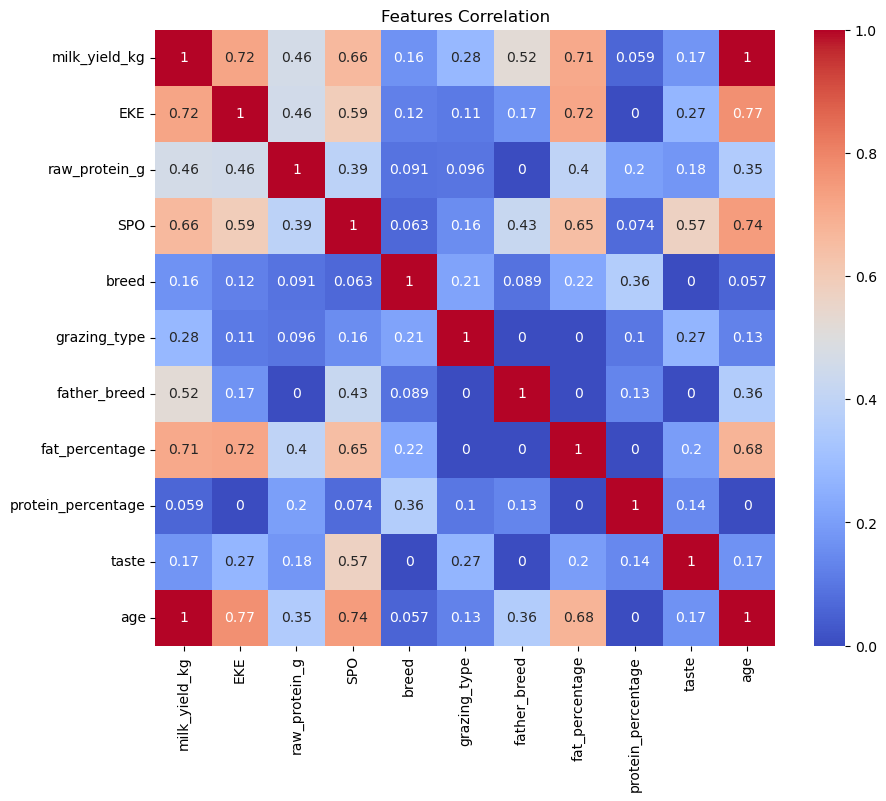

In [335]:
# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Features Correlation')
plt.show()

1. Целевой признак - **удой**.
- Отмечается высокая корреляция с ЭКЕ, СПО, умеренная с сырым протеином, породой папы и низкая с породой коровы и типом пастбища.
2. Целевой признак - **вкус**.
- Умеренная корреляция с СПО и низкая с ЭКЕ, сырым протеином, типом пастбища.
- Отсутствует корреляция с породой коровы и породой быка.

### 2.2 Взаимосвязи между целевым (удой) и входными количественными признаками

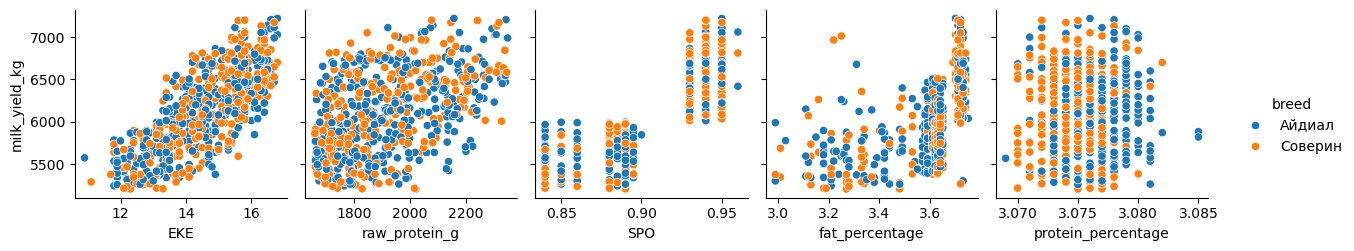

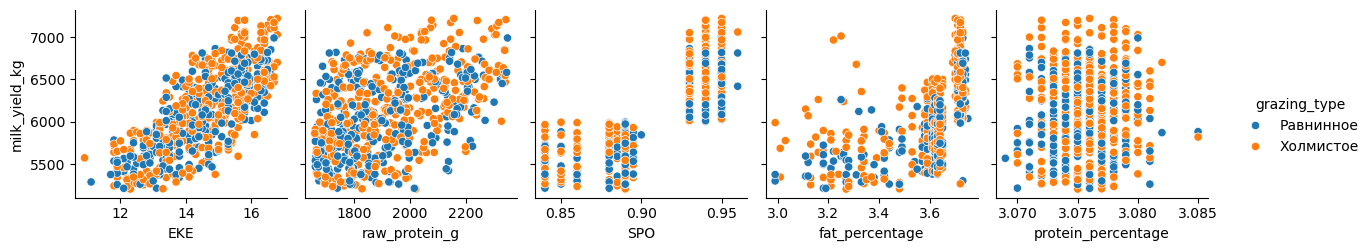

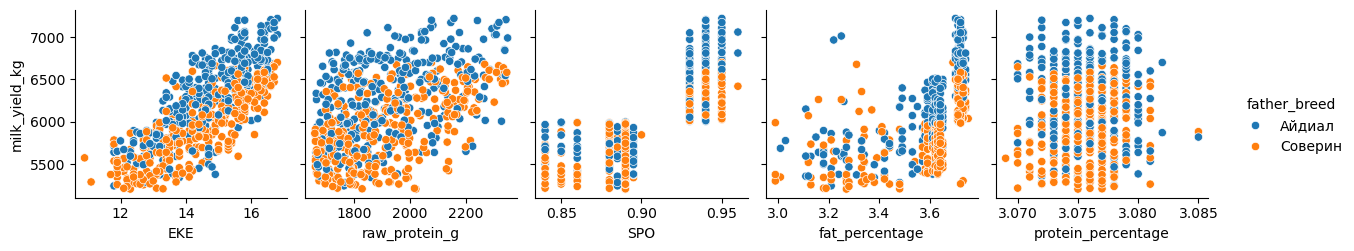

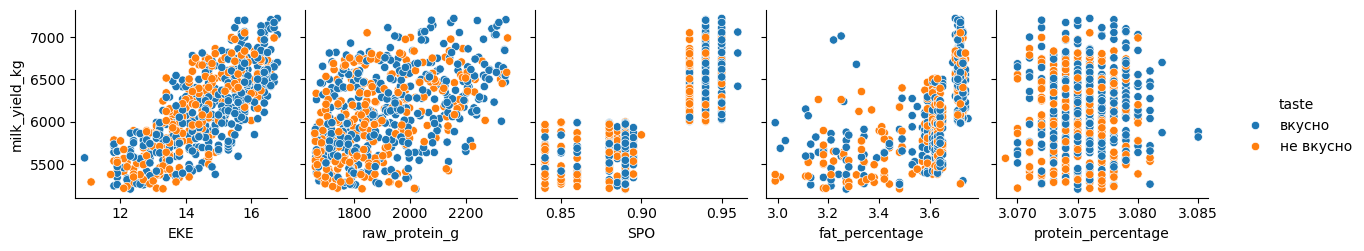

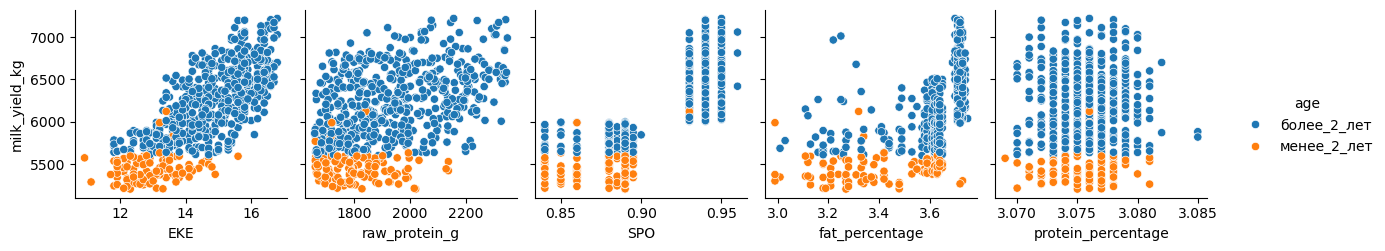

In [336]:
# Диаграммы рассеяния зависимости целевого признака от количественных признаков с учётом категориальных признаков

numeric_features = num_columns_current
numeric_features.remove('milk_yield_kg')
category_features = non_num_columns_current

for category in category_features:
    sns.pairplot(current, x_vars=numeric_features, y_vars='milk_yield_kg', hue=category)

1. Некоторые входные признаки связаны с целевым нелинейно.
- ЭКЕ и Удой связаны нелинейно, прослеживается порабола.
- СПО и Удой связаны нелинейно - можно выделить две группы наблюдений - больше 0.9 и меньше или равно 0.9. 
2. Возможно стоит вводить в модель дополнительные признаки, чтобы устранить нелинейность.

3. Сильная линейная связь (|корр.|=0.9-0.95) входных признаков не прослеживается.

4. Можно также отметить, что некоторые категориальные признаки также влияют на таргет.

- Возраст - независимо от количественных признаков, удой выше у коров, которые старше 2-х лет. 
- Повышенное СПО в питании коров применяется только для коров старше 2-х лет. 
- Порода быка - увеличение ЭКЕ и СПО в питании коровы приводит к большим удоям, если папа был породы Айдиал.

## 3 Создание моделей МО и предсказание удоя с помощью линейной регрессии

### 3.1 Модель №1

1. Целевой признак - **удой**.

2. Отберем входные признаки, которые подходят для модели линейной регрессии.
- Из исходного датасета необходимо убрать прочие характеристики готового продукта: жирность, белок, вкус молока.
- Подойдут следующие входные признаки: характеристики коровы: порода, порода папы быка, возраст; характеристики корма: ЭКЕ (энергетическая кормовая единица), сырой протеин, СПО (сахаро-протеиновое соотношение), характеристика пастбища: тип пастбища.
- Однако, корреляция слабая для признаков 'порода' и 'тип пастбища'.
Проверим статистическую значимость этих признаков.

In [337]:
# Проверка статистической значимости различий в среднем удое молока между типами пастбищ
group1 = current[current['grazing_type'] == 'Равнинное']['milk_yield_kg']
group2 = current[current['grazing_type'] == 'Холмистое']['milk_yield_kg']

t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-статистика: {t_statistic}")
print(f"P-значение: {p_value}")

if p_value < 0.05:
    print("Различия в среднем удое молока между типами пастбищ статистически значимы.")
else:
    print("Различия в среднем удое молока между типами пастбищ не статистически значимы.")

T-статистика: -3.296034451925219
P-значение: 0.0010360171873599526
Различия в среднем удое молока между типами пастбищ статистически значимы.


In [338]:
# Проверка статистической значимости различий в среднем удое молока между породами коров
group1 = current[current['breed'] == 'Айдиал']['milk_yield_kg']
group2 = current[current['breed'] == 'Соверин']['milk_yield_kg']

t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-статистика: {t_statistic}")
print(f"P-значение: {p_value}")

if p_value < 0.05:
    print("Различия в среднем удое молока между породами коров статистически значимы.")
else:
    print("Различия в среднем удое молока между породами коров статистически не значимы.")

T-статистика: -1.6887286120361684
P-значение: 0.09176945431785785
Различия в среднем удое молока между породами коров статистически не значимы.


Определены следующие входные признаки: 
- порода папы быка, 
- возраст,
- ЭКЕ (энергетическая кормовая единица), 
- сырой протеин, 
- СПО (сахаро-протеиновое соотношение),
- тип пастбища.

In [339]:
# Определение входных и целевого признака
X = current[['father_breed', 'age', 'EKE', 'raw_protein_g', 'SPO', 'grazing_type']]
y = current['milk_yield_kg']

In [340]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [341]:
# Проверка размеров выборок
print(X_train.shape[0])
print(X_test.shape[0])

471
157


In [342]:
print(y_train.shape[0])
print(y_test.shape[0])

471
157


In [343]:
# Кодирование категориальных признаков

X_train_cat = X_train[['father_breed', 'age','grazing_type']]
X_test_cat = X_test[['father_breed', 'age','grazing_type']]

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

encoder.get_feature_names_out()

array(['father_breed_Соверин', 'age_менее_2_лет',
       'grazing_type_Холмистое'], dtype=object)

In [344]:
# Масштабирование количественных признаков

X_train_num = X_train[['EKE', 'raw_protein_g', 'SPO']]
X_test_num = X_test[['EKE', 'raw_protein_g', 'SPO']]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [345]:
# Объединение
X_train_combined = pd.concat([pd.DataFrame(X_train_encoded), pd.DataFrame(X_train_scaled)], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_encoded), pd.DataFrame(X_test_scaled)], axis=1)

In [346]:
# Обучение модели линейной регрессии
model_lr = LinearRegression()
model_lr.fit(X_train_combined, y_train)

y_pred = model_lr.predict(X_test_combined)

print(y_pred[1], y_test.iloc[1])

6433.555893851966 6512


In [347]:
# Pассчёт коэффициента детерминации
r2_1 = r2_score(y_test, y_pred) 
print(f"Метрика R2: {r2_1}")

Метрика R2: 0.7845172014157419


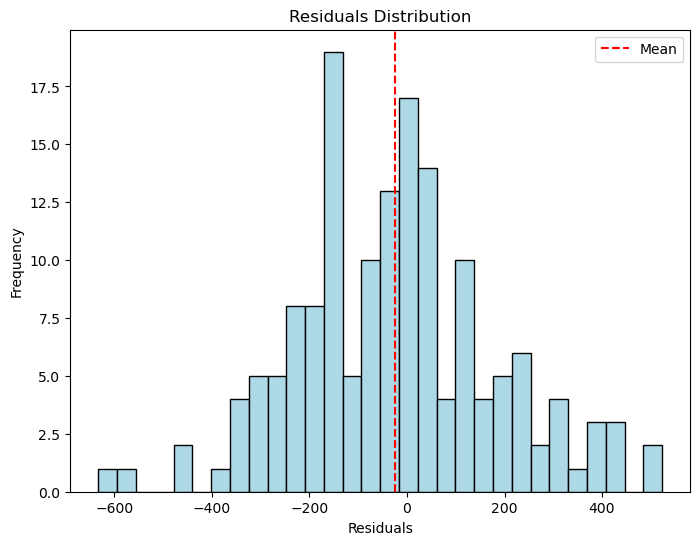

In [348]:
# Рассчёт остатков
residuals = y_test - y_pred

# График остатков
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='red', linestyle='--', label='Mean')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

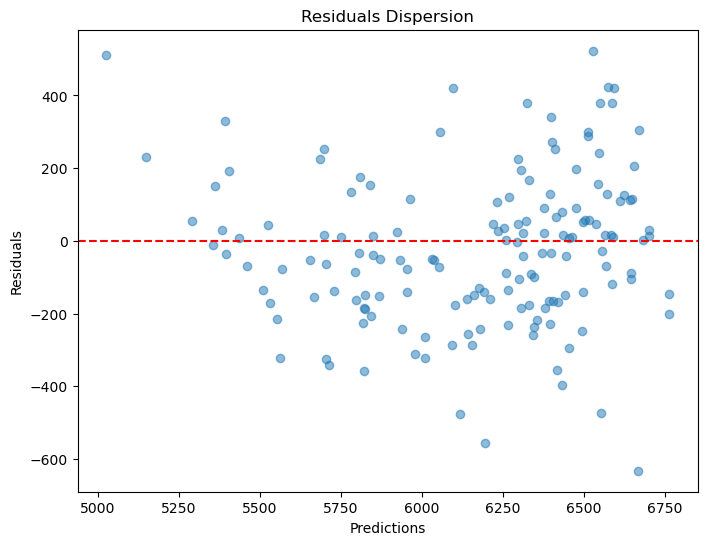

In [349]:
# Оценка дисперсии остатков

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Dispersion')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

1. Значение метрики R2 составляет примерно 0.795.

2. Остатки имеют нормальное распределение с выбросами и со смещением влево от нуля, это означает, модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений. 

3. Дисперсия не однородная, имеет форму "рупор", модель в работе использовать нежелательно, её нужно улучшить.

4. Необходимо:
- Трансформировать данные, чтобы изменить нелинейную взаимосвязь входных признаков с целевым (ЭКЕ, СПО).
- Добавить в модель дополнительные признаки, из имеющихся есть таблица с именами пап быков.

### 3.2 Модель №2

1. Целевой признак - **удой**.

2. Входные признаки:
- порода папы быка, 
- возраст,
- ЭКЕ (энергетическая кормовая единица), 
- сырой протеин, 
- СПО (сахаро-протеиновое соотношение),
- тип пастбища.

3. Необходимо изменить нелинейную взаимосвязь входных признаков с целевым (ЭКЕ, СПО).

In [350]:
# Преобразование СПО в категориальный бинарный признак
current['SPO_greater_0_9'] = (current['SPO'] > 0.9).astype(int)

In [351]:
# Добавление нового признака - ЭКЕ в квадрате
current['EKE_squared'] = current['EKE']**2

In [352]:
# Исходная таблица с новыми признаками
current.head()

,ID,milk_yield_kg,EKE,raw_protein_g,SPO,breed,grazing_type,father_breed,fat_percentage,protein_percentage,taste,age,SPO_greater_0_9,EKE_squared
0,1,5863,14.20,1743,0.89,Айдиал,Равнинное,Айдиал,3.58,3.08,вкусно,более_2_лет,0,201.64
1,2,5529,12.80,2138,0.89,Айдиал,Равнинное,Соверин,3.54,3.08,вкусно,менее_2_лет,0,163.84
2,3,5810,14.00,1854,0.89,Соверин,Холмистое,Соверин,3.59,3.07,не вкусно,более_2_лет,0,196.00
3,4,5895,12.40,2012,0.89,Соверин,Холмистое,Айдиал,3.40,3.08,не вкусно,более_2_лет,0,153.76
4,5,5302,12.80,1675,0.89,Айдиал,Равнинное,Соверин,3.73,3.07,вкусно,менее_2_лет,0,163.84


In [353]:
# Определение входных и целевого признаков
X_2 = current[['raw_protein_g','grazing_type', 'father_breed', 'age', 'SPO_greater_0_9', 'EKE_squared']]
y_2 = current['milk_yield_kg']

# Тренировочная и тестовая выборки
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, random_state=42)

# Кодирование категориальных признаков
X_2_train_cat = X_2_train[['grazing_type', 'father_breed', 'age', 'SPO_greater_0_9']]
X_2_test_cat = X_2_test[['grazing_type', 'father_breed', 'age', 'SPO_greater_0_9']]

X_2_train_encoded = encoder.fit_transform(X_2_train_cat)
X_2_test_encoded = encoder.transform(X_2_test_cat)

# Масштабирование количественных признаков
X_2_train_num = X_2_train[['raw_protein_g', 'EKE_squared']]
X_2_test_num = X_2_test[['raw_protein_g', 'EKE_squared']]

X_2_train_scaled = scaler.fit_transform(X_2_train_num)
X_2_test_scaled = scaler.transform(X_2_test_num)

# Объединение
X_2_train_combined = pd.concat([pd.DataFrame(X_2_train_encoded), pd.DataFrame(X_2_train_scaled)], axis=1)
X_2_test_combined = pd.concat([pd.DataFrame(X_2_test_encoded), pd.DataFrame(X_2_test_scaled)], axis=1)

# Обучение модели линейной регрессии
model_lr.fit(X_2_train_combined, y_2_train)

y_2_pred = model_lr.predict(X_2_test_combined)

print(y_2_pred[1], y_2_test.iloc[1])

6464.678588583026 6512


In [354]:
# Pассчёт коэффициента детерминации
r2_2 = r2_score(y_2_test, y_2_pred) 
print(f"Метрика R2: {r2_2}")

Метрика R2: 0.8175976485297578


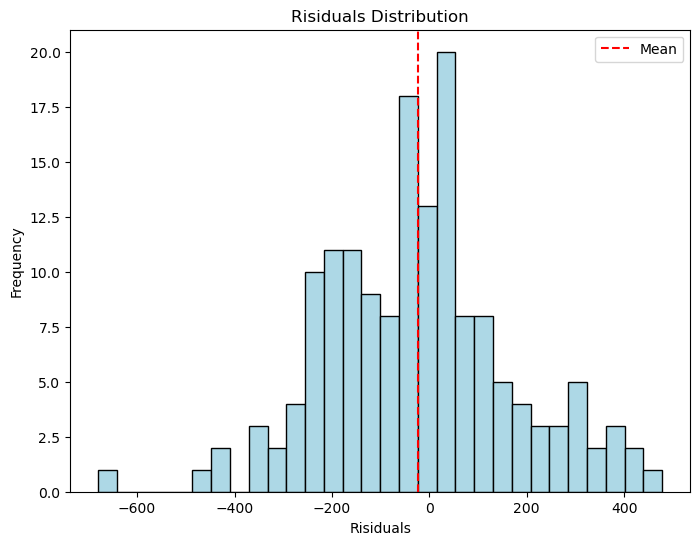

In [355]:
# Рассчёт остатков
residuals_2 = y_2_test - y_2_pred

# Распределение остатков
plt.figure(figsize=(8, 6))
plt.hist(residuals_2, bins=30, color='lightblue', edgecolor='black')
plt.axvline(x=residuals_2.mean(), color='red', linestyle='--', label='Mean')
plt.title('Risiduals Distribution')
plt.xlabel('Risiduals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

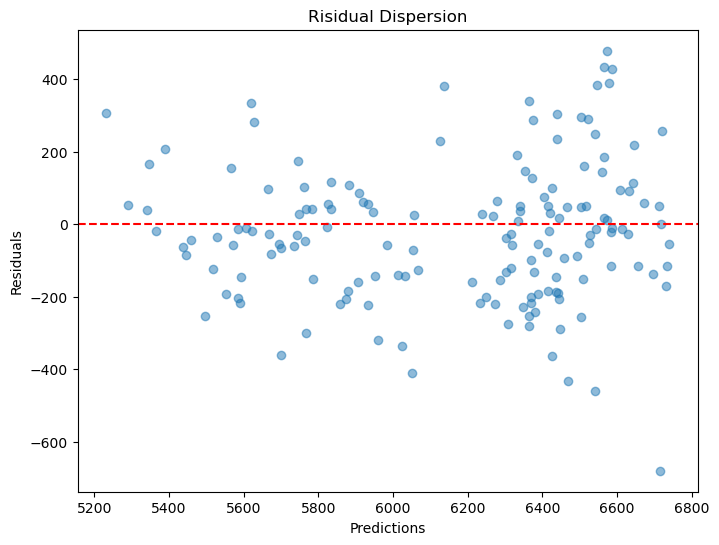

In [356]:
# Оценка дисперсии остатков

plt.figure(figsize=(8, 6))
plt.scatter(y_2_pred, residuals_2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Risidual Dispersion')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

1. Значение метрики R2 для Модели №2 составляет примерно 0.825, что выше, чем в Модели №1.

2. Остатки имеют нормальное распределение с выбросами, смещение относительно нуля стало меньше по отношению с Моделью №1.

3. Дисперсия более однородная, однако, Модель №2 можно ещё улучшить.

4. Необходимо добавить в модель дополнительные признаки, из имеющихся есть таблица с именами пап быков.

### 3.3 Модель №3

1. Целевой признак - **удой**.

2. Входные признаки:
- порода папы быка, 
- возраст,
- ЭКЕ возведённая в квадрат, 
- сырой протеин, 
- СПО приведённое к бинарному виду,
- тип пастбища.

3. Необходимо добавить признак - имя папы быка.

In [357]:
# Объединение датафреймов
current_merged = current.merge(father_info)

if current_merged.shape[0] == current.shape[0]:
    print('merge successful')
else:
    print('error while merge')

if current_merged.duplicated().sum() > 0:
    print('duplicates detected')
    print(current_merged.duplicated().sum())
else:
    print('no duplicates in the merged dataframe')

if current_merged['ID'].duplicated().sum() > 0:
    print('primary keys duplicates detected')
    print(current_merged['ID'].duplicated().sum())
else:
    print('no duplicates in primary keys')


merge successful
no duplicates in the merged dataframe
no duplicates in primary keys


In [358]:
# Итоговый датафрейм
current_merged.head()

,ID,milk_yield_kg,EKE,raw_protein_g,SPO,breed,grazing_type,father_breed,fat_percentage,protein_percentage,taste,age,SPO_greater_0_9,EKE_squared,father_name
0,1,5863,14.20,1743,0.89,Айдиал,Равнинное,Айдиал,3.58,3.08,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.80,2138,0.89,Айдиал,Равнинное,Соверин,3.54,3.08,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.00,1854,0.89,Соверин,Холмистое,Соверин,3.59,3.07,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.40,2012,0.89,Соверин,Холмистое,Айдиал,3.40,3.08,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.80,1675,0.89,Айдиал,Равнинное,Соверин,3.73,3.07,вкусно,менее_2_лет,0,163.84,Барин


In [359]:
# Определение входных и целевого признаков
X_3 = current_merged[['raw_protein_g','grazing_type', 'father_breed', 'age', 'SPO_greater_0_9', 'EKE_squared', 'father_name']]
y_3 = current_merged['milk_yield_kg']

# Тренировочная и тестовая выборки
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, random_state=42)

# Кодирование категориальных признаков
X_3_train_cat = X_3_train[['grazing_type', 'father_breed', 'age', 'SPO_greater_0_9','father_name']]
X_3_test_cat = X_3_test[['grazing_type', 'father_breed', 'age', 'SPO_greater_0_9','father_name']]

X_3_train_encoded = encoder.fit_transform(X_3_train_cat)
X_3_test_encoded = encoder.transform(X_3_test_cat)

# Масштабирование количественных признаков
X_3_train_num = X_3_train[['raw_protein_g', 'EKE_squared']]
X_3_test_num = X_3_test[['raw_protein_g', 'EKE_squared']]

X_3_train_scaled = scaler.fit_transform(X_3_train_num)
X_3_test_scaled = scaler.transform(X_3_test_num)

# Объединение
X_3_train_combined = pd.concat([pd.DataFrame(X_3_train_encoded), pd.DataFrame(X_3_train_scaled)], axis=1)
X_3_test_combined = pd.concat([pd.DataFrame(X_3_test_encoded), pd.DataFrame(X_3_test_scaled)], axis=1)

# Обучение модели линейной регрессии
model_lr.fit(X_3_train_combined, y_3_train)

y_3_pred = model_lr.predict(X_3_test_combined)

print(y_3_pred[1], y_3_test.iloc[1])

6478.963090487698 6512


In [360]:
# Pассчёт коэффициента детерминации
r2_3 = r2_score(y_3_test, y_3_pred) 
print(f"Метрика R2: {r2_3}")

Метрика R2: 0.8220838867698493


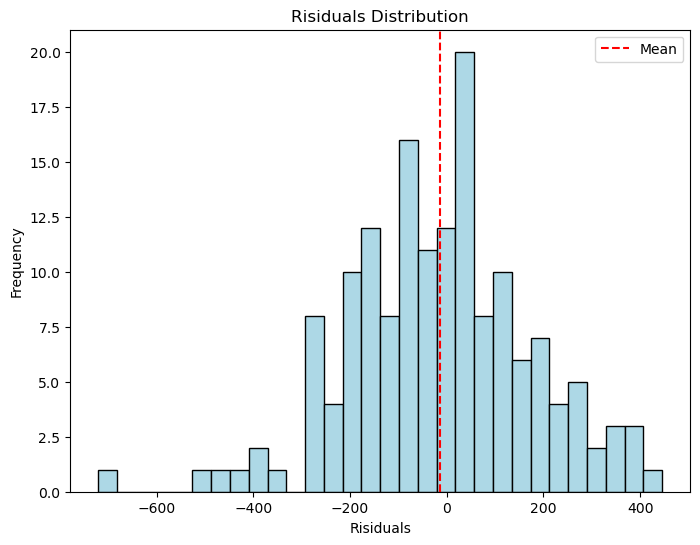

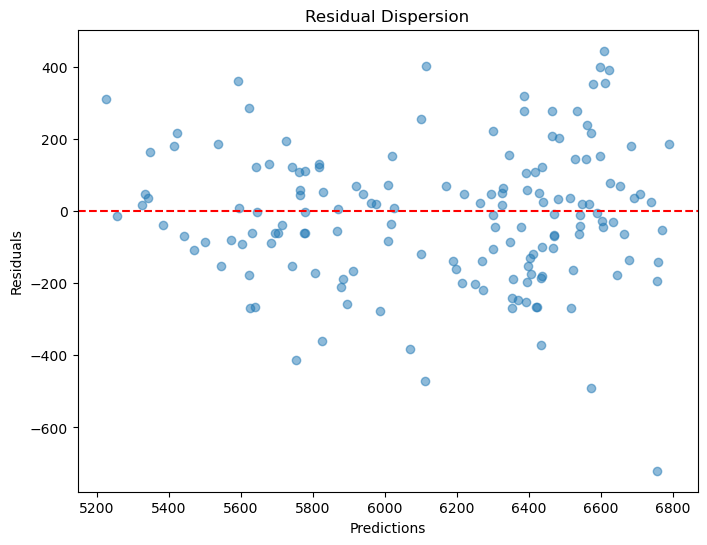

In [361]:
# Рассчёт остатков
residuals_3 = y_3_test - y_3_pred

# Распределение остатков
plt.figure(figsize=(8, 6))
plt.hist(residuals_3, bins=30, color='lightblue', edgecolor='black')
plt.axvline(x=residuals_3.mean(), color='red', linestyle='--', label='Mean')
plt.title('Risiduals Distribution')
plt.xlabel('Risiduals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Оценка дисперсии остатков
plt.figure(figsize=(8, 6))
plt.scatter(y_3_pred, residuals_3, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Dispersion')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

1. Значение метрики R2 для Модели №3 составляет примерно 0.831, что выше, чем у Моделей №1,2. Это означает, что в 83 % случаев предсказание модели точнее, чем среднее значение целевого признака.

2. Остатки имеют нормальное распределение с выбросами, смещение относительно нуля минимальное.

3. Дисперсия Модели №3 не идеальная, но наиболее однородная.

### 3.4 Сравнение метрик качества MSE, MAE, RMSE для Моделей №1,2,3.

Для сравнения изменения качества модели по мере произведённой настройки и обучения рассчитаем метрики качества.

In [362]:
# Модель 1
errors(y_test, y_pred)

MSE: 43864.74824451047
MAE: 164.24418863858423
RMSE: 209.43912777824127


In [363]:
# Модель 2
errors(y_2_test, y_2_pred)

MSE: 37130.728202048675
MAE: 149.1540507071929
RMSE: 192.69335277079142


In [364]:
# Модель 3
errors(y_3_test, y_3_pred)

MSE: 36217.48727395871
MAE: 146.95615319357333
RMSE: 190.3089258914534


1. MSE: Модель №3 имеет наименьшее значение MSE, что указывает на то, что она имеет наименьшую среднеквадратичную ошибку и лучше всего соответствует данным.
2. MAE: Все три модели имеют сравнимые значения MAE, но лучше всего с этой метрикой справилась Модель №2.
3. RMSE: Как и в случае MSE, Модель №3 имеет наименьшее значение RMSE, что также указывает на то, что она лучше всего подходит для моделирования.

- На основе этих метрик можно заключить, что  **Модель №3** имеет лучшее качество прогноза с точки зрения всех трех метрик.





In [365]:
# Расчёт доверительного интервала для Модели 3
lower_quantile = np.quantile(y_3_pred, 0.025)
upper_quantile = np.quantile(y_3_pred, 0.975)
print("95% интервал удоя коров:", (lower_quantile, upper_quantile))

95% интервал удоя коров: (5341.537006042414, 6755.9290533385965)


Значения этих квантилей представляют собой границы 95% интервала, в котором ожидается удой коров с вероятностью 95%.

### 3.5 Прогнозирование удоя коров Фермы

1. Целевой признак - **удой**.

2. Входные признаки:
- порода папы быка, 
- возраст,
- ЭКЕ возведённая в квадрат, 
- сырой протеин, 
- СПО приведённое к бинарному виду,
- тип пастбища.
- имя папы быка.

In [366]:
# Добавление недостающих признаков ЭКЕ, Сырой протеин и СПО (Сахаро-протеиновое соотношение).
# Для новых коров эти показатели будут увеличены на 5%.
eco_farm['EKE'] = (current['EKE'].mean())*1.05
eco_farm['raw_protein_g'] = (current['raw_protein_g'].mean())*1.05
eco_farm['SPO'] = (current['SPO'].mean())*1.05

In [367]:
# Преобразование СПО в категориальный бинарный признак
eco_farm['SPO_greater_0_9'] = (eco_farm['SPO'] > 0.9).astype(int)

In [368]:
# Добавление нового признака - ЭКЕ в квадрате
eco_farm['EKE_squared'] = eco_farm['EKE']**2

In [369]:
# Итоговый датафрейм 
eco_farm.head()

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age,EKE,raw_protein_g,SPO,SPO_greater_0_9,EKE_squared
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,15.28,"2,019.95",0.96,1,233.36
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,15.28,"2,019.95",0.96,1,233.36
2,Соверин,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,15.28,"2,019.95",0.96,1,233.36
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36


In [370]:
# Формирование датафрейма с признаками
features = eco_farm[['raw_protein_g','grazing_type', 'father_breed', 'age', 'SPO_greater_0_9', 'EKE_squared', 'father_name']]

# Кодирование категориальных признаков
features_cat = features[['grazing_type', 'father_breed', 'age', 'SPO_greater_0_9','father_name']]
features_cat_encoded = encoder.transform(features_cat)

# Масштабирование количественных признаков
features_num = features[['raw_protein_g', 'EKE_squared']]
features_num_scaled = scaler.transform(features_num)

# Объединение
features_combined = pd.concat([pd.DataFrame(features_cat_encoded), pd.DataFrame(features_num_scaled)], axis=1)

# Предсказание удоя
eco_farm['predicted_yield'] = model_lr.predict(features_combined)

In [371]:
# Итоговый датафрейм c предсказанным удоем
eco_farm.head()

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age,EKE,raw_protein_g,SPO,SPO_greater_0_9,EKE_squared,predicted_yield
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,613.28"
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,383.03"
2,Соверин,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,276.60"
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,584.99"
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,532.98"


In [372]:
eco_farm.loc[eco_farm['predicted_yield'] >= 6000]

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age,EKE,raw_protein_g,SPO,SPO_greater_0_9,EKE_squared,predicted_yield
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,613.28"
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,383.03"
2,Соверин,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,276.60"
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,584.99"
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,532.98"
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.05,менее_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,411.31"
6,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,613.28"
7,Айдиал,Равнинное,Соверин,Буйный,3.57,3.08,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,576.72"
8,Соверин,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,276.60"
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,391.29"


1. На основании предоставленных заказчиком данных модель спрогнозировала удой всех коров Фермы выше необходимого порогового значения (6000 кг./год).
2. Проверка коров Фермы на соответствие второму критерию заказчика (вкусное молоко) представлена в разделе 4.

## 4 Создание модели МО и предсказание качества продукта с помощью логистической регрессии

### 4.1 Подготовка модели

1. Целевой признак - **вкус**.

2. Входные признаки, отобранные по матрице корреляции:
- возраст,
- ЭКЕ возведённая в квадрат, 
- сырой протеин, 
- СПО,
- тип пастбища.

In [373]:
matrix = current_merged.drop('ID', axis=1)
matrix.phik_matrix(interval_cols=['milk_yield_kg', 'EKE', 'raw_protein_g', 'SPO', 
                                  'fat_percentage', 'protein_percentage', 'SPO_greater_0_9', 
                                  'EKE_squared'])

,milk_yield_kg,EKE,raw_protein_g,SPO,breed,grazing_type,father_breed,fat_percentage,protein_percentage,taste,age,SPO_greater_0_9,EKE_squared,father_name
milk_yield_kg,1.00,0.72,0.46,0.66,0.16,0.28,0.52,0.71,0.06,0.17,1.00,1.00,0.72,0.43
EKE,0.72,1.00,0.46,0.59,0.12,0.11,0.17,0.72,0.00,0.27,0.77,0.90,0.98,0.07
raw_protein_g,0.46,0.46,1.00,0.39,0.09,0.10,0.00,0.40,0.20,0.18,0.35,0.54,0.45,0.11
SPO,0.66,0.59,0.39,1.00,0.06,0.16,0.43,0.65,0.07,0.57,0.74,1.00,0.58,0.41
breed,0.16,0.12,0.09,0.06,1.00,0.21,0.09,0.22,0.36,0.00,0.06,0.03,0.07,0.38
grazing_type,0.28,0.11,0.10,0.16,0.21,1.00,0.00,0.00,0.10,0.27,0.13,0.14,0.15,0.23
father_breed,0.52,0.17,0.00,0.43,0.09,0.00,1.00,0.00,0.13,0.00,0.36,0.41,0.15,0.98
fat_percentage,0.71,0.72,0.40,0.65,0.22,0.00,0.00,1.00,0.00,0.20,0.68,0.92,0.71,0.09
protein_percentage,0.06,0.00,0.20,0.07,0.36,0.10,0.13,0.00,1.00,0.14,0.00,0.00,0.00,0.09
taste,0.17,0.27,0.18,0.57,0.00,0.27,0.00,0.20,0.14,1.00,0.17,0.10,0.31,0.00


In [374]:
# Отделение признаков
X = current_merged[['raw_protein_g', 'SPO', 'grazing_type', 'age', 'EKE_squared']]
y = current_merged['taste']

# Кодирование таргета
le = LabelEncoder()
y = le.fit_transform(y)
y = 1-y

In [375]:
# Формирование выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [376]:
# Кодирование
X_train_cat = X_train[['grazing_type', 'age']]
X_test_cat = X_test[['grazing_type', 'age']]

X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

In [377]:
# Масштабирование
X_train_num = X_train[['raw_protein_g', 'SPO', 'EKE_squared']]
X_test_num = X_test[['raw_protein_g', 'SPO', 'EKE_squared']]

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [378]:
# Объединение
X_train = pd.concat([pd.DataFrame(X_train_encoded), pd.DataFrame(X_train_scaled)], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_encoded), pd.DataFrame(X_test_scaled)], axis=1)

# Обучение модели
model_log_regr = LogisticRegression()
model_log_regr.fit(X_train, y_train)

# Предсказание
y_pred = model_log_regr.predict(X_test)

### 4.2 Анализ модели

In [379]:
# Расчёт метрик качества модели (accuracy, recall, precision)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision for 'вкусно':", precision)
print("Recall for 'вкусно':", recall)

Accuracy: 0.5732484076433121
Precision for 'вкусно': 0.5897435897435898
Recall for 'вкусно': 0.7840909090909091


1. **Accuracy** показывает, что верными являются 60% предсказаний.

2. **Precision** показывает долю правильно предсказанного класса "вкусно" от общего количества предсказаний "вкусно", т.е. в 60% модель присваивает вкусному молоку класс "вкусно", а значит в 40% случаев модель присваивает класс "вкусно" не вкусному молоку.

3. **Recall** показывает долю правильно предсказанного класса "вкусно" от общего количества признаков имеющих в действительности класс "вкусно", т.е. в 80% модель присваивает вкусному молоку класс "вкусно", а в 20 % модель присваивает класс "не вкусно" вкусному молоку.

Text(0.5, 23.52222222222222, 'Predicted')

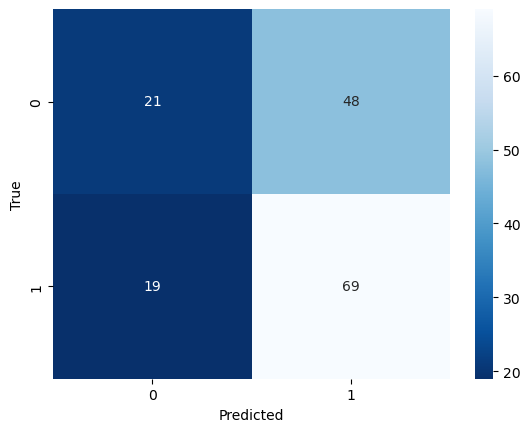

In [380]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True')
plt.xlabel('Predicted')

- В 69 случаях модель правильно отнесла вкусное молоко к категории 'вкусно'.
- В 48 случаях модель неправильно отнесла невкусное молоко к категории 'вкусно'.
- В 19 случаях модель неправильно отнесла вкусное молоко к категории ' не вкусно'.
- В 21 случаях модель правильно отнесла невкусное молоко к категории 'не вкусно'.

1. В контексте покупки коров для получения вкусного молока, критической ошибкой является неверное классифицирование молока как "вкусного", когда на самом деле оно не является таковым.
2. Необходимо изменить порог для метрики **precision**.

In [381]:
# Создание порогов
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 10,endpoint=False)]
print(thresholds)

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


In [382]:
y_proba = model_log_regr.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
                          columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data

,y_valid,y_proba,y_pred_0.5,y_pred_0.55,y_pred_0.6,y_pred_0.65,y_pred_0.7,y_pred_0.75,y_pred_0.8,y_pred_0.85,y_pred_0.9,y_pred_0.95
85,1,0.82,1,1,1,1,1,1,1,0,0,0
146,1,0.82,1,1,1,1,1,1,1,0,0,0
114,1,0.82,1,1,1,1,1,1,1,0,0,0
39,1,0.81,1,1,1,1,1,1,1,0,0,0
86,1,0.79,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0.33,0,0,0,0,0,0,0,0,0,0
44,0,0.32,0,0,0,0,0,0,0,0,0,0
46,0,0.32,0,0,0,0,0,0,0,0,0,0
84,0,0.31,0,0,0,0,0,0,0,0,0,0


In [383]:
# Анализ precision
precision_df = pd.DataFrame(columns=['threshold', 'precision'])

for threshold in thresholds:
    
    column_name = 'y_pred_' + str(threshold)

    precision = precision_score(data['y_valid'], data[column_name], zero_division=1)
   
    precision_df = pd.concat([precision_df, pd.DataFrame({'threshold': [threshold], 'precision': [precision]})])

print(precision_df)

   threshold  precision
0       0.50       0.59
0       0.55       0.62
0       0.60       0.62
0       0.65       0.67
0       0.70       0.84
0       0.75       0.95
0       0.80       1.00
0       0.85       1.00
0       0.90       1.00
0       0.95       1.00


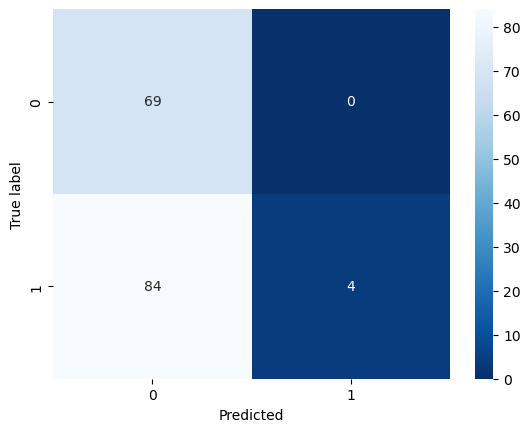

In [384]:
# Построение матрицы ошибок
cm_new = confusion_matrix(data['y_valid'], data['y_pred_0.8'])
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

- Выберем порог при котором метрика precision = 1 (т.е. 100 % правильность), и количетсво ложно-положительных ответов модели сократится до 0.
- Такой порог будет равен 0.8.
- Проверка порога приведена в разделе 4.3.

### 4.3 Прогнозирование вкуса молока коров

1. Целевой признак - **вкус**.

2. Входные признаки, отобранные по матрице корреляции:
- возраст,
- ЭКЕ возведённая в квадрат, 
- сырой протеин, 
- СПО,
- тип пастбища.

In [385]:
eco_farm.head()

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age,EKE,raw_protein_g,SPO,SPO_greater_0_9,EKE_squared,predicted_yield
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,613.28"
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,383.03"
2,Соверин,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,276.60"
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,584.99"
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,532.98"


In [386]:
# Формирование датафрейма с признаками
features = eco_farm[['raw_protein_g', 'SPO', 'grazing_type', 'age', 'EKE_squared']]

# Кодирование категориальных признаков
features_cat = features[['grazing_type', 'age']]
features_cat_encoded = encoder.transform(features_cat)

# Масштабирование количественных признаков
features_num = features[['raw_protein_g', 'SPO', 'EKE_squared']]
features_num_scaled = scaler.transform(features_num)

# Объединение
features_combined = pd.concat([pd.DataFrame(features_cat_encoded), pd.DataFrame(features_num_scaled)], axis=1)

In [387]:
# Предсказание удоя
threshold = 0.8
y_proba = model_log_regr.predict_proba(features_combined)[:, 1]
eco_farm['predicted_taste'] = (y_proba > threshold).astype(int)
#eco_farm['predicted_taste'] = eco_farm['predicted_taste'].apply(lambda x: 'вкусное' if x == 1 else 'не вкусное')

In [388]:
eco_farm.loc[(eco_farm['predicted_yield'] >= 6000) & (eco_farm['predicted_taste'] == 'вкусное')]

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age,EKE,raw_protein_g,SPO,SPO_greater_0_9,EKE_squared,predicted_yield,predicted_taste


1. Порог 0.8 оказался слишком высоким, модель не сделала никаких предсказаний.
2. Необходимо понизить значение порога.

In [389]:
eco_farm.sample(5)

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age,EKE,raw_protein_g,SPO,SPO_greater_0_9,EKE_squared,predicted_yield,predicted_taste
17,Соверин,Равнинное,Соверин,Геркулес,3.77,3.05,менее_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,411.31",0
12,Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.05,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,613.28",0
16,Айдиал,Холмистое,Соверин,Соловчик,3.73,3.08,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,349.82",0
18,Айдиал,Равнинное,Соверин,Буйный,3.34,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,576.72",0
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,532.98",0


In [407]:
from sklearn.metrics import precision_recall_curve
y_true = data['y_valid']
y_scores = data['y_proba']
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

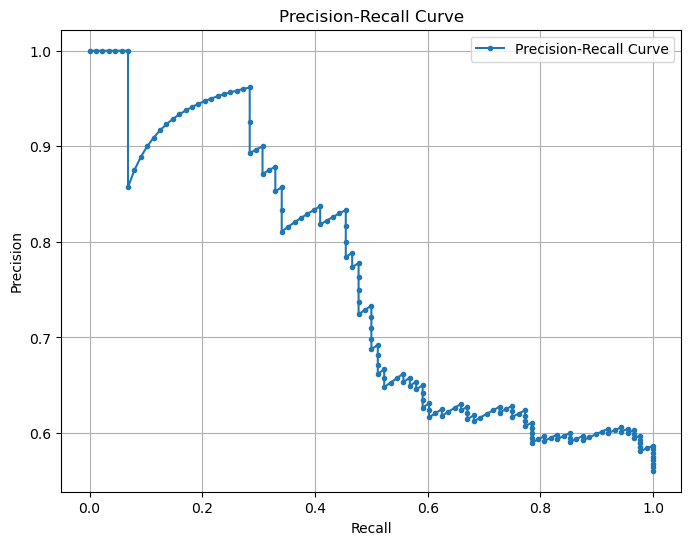

In [408]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

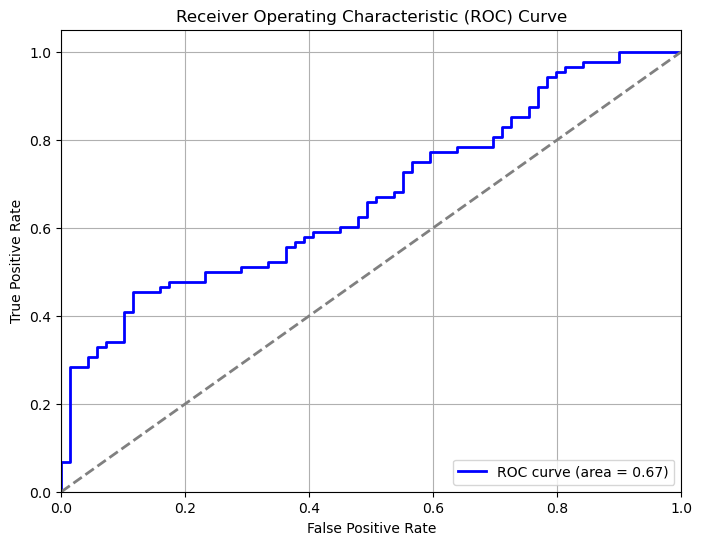

In [400]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Новое значение порога
threshold = 0.757
y_proba = model_log_regr.predict_proba(features_combined)[:, 1]
eco_farm['predicted_taste'] = (y_proba > threshold).astype(int)
eco_farm['predicted_taste'] = eco_farm['predicted_taste'].apply(lambda x: 'вкусное' if x == 1 else 'не вкусное')

In [ ]:
eco_farm.loc[(eco_farm['predicted_yield'] >= 6000) & (eco_farm['predicted_taste'] == 'вкусное')]

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age,EKE,raw_protein_g,SPO,SPO_greater_0_9,EKE_squared,predicted_yield,predicted_taste
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,391.29",вкусное
13,Айдиал,Холмистое,Соверин,Барин,3.42,3.08,менее_2_лет,15.28,"2,019.95",0.96,1,233.36,"6,134.92",вкусное


- Модель предсказала, что две коровы из исходного перечня будут соотвествовать заданному критерию.

Отберём коров, рекомендуемых заказчику к покупке у Фермы.

In [ ]:
recommended = eco_farm.loc[(eco_farm['predicted_yield'] >= 6000) & (eco_farm['predicted_taste'] == 'вкусное')]
recommended = recommended.drop(['EKE', 'raw_protein_g', 'SPO', 'SPO_greater_0_9', 'EKE_squared'], axis=1)
recommended

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age,predicted_yield,predicted_taste
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,"6,391.29",вкусное
13,Айдиал,Холмистое,Соверин,Барин,3.42,3.08,менее_2_лет,"6,134.92",вкусное


## 5 Итоговые выводы и рекомендации заказчику

- В вышеприведённом проекте разарботаны модели машинного обучения для прогнозиварования ключевых метрик (удой - не менее 6000 кг./г., качество продукта - вкусное молоко).

- Рекомендованые к приобретению коровы ООО "ЭкоФерма" представлены ниже.

In [ ]:
recommended

,breed,grazing_type,father_breed,father_name,fat_percentage,protein_percentage,age,predicted_yield,predicted_taste
9,Соверин,Холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,"6,391.29",вкусное
13,Айдиал,Холмистое,Соверин,Барин,3.42,3.08,менее_2_лет,"6,134.92",вкусное


1. Таким образом, риски будут минимальны при приобретении заказчиком 2-х коров из стада Фермы. 

2. Однако, отмечается, что модель не идеальна (в распределении остатков среднее незначительно отклоняется от нуля), поэтому модель может слегка завышать предсказание удоя. 

3. Желательно получить дополнительные характеристики коров Хозяйства и Фермы для лучшего исследования их влияния на целевые признаки.

4. Выводы о моделях линейной регрессии и логистической регрессии.
- Для улучшения и настройки модели линейной регресси в исходный датафрейм были добавлены дополнительные признаки, устранена нелинейность в зависимости таргета от показателей ЭКЕ и СПО. 
- Для улучшения и настройки модели линейной регресси былв осуществлена корректировка порога классификации с целью сведения ложно-положительного результата к минимуму.
- Также, для избежания сокращения объёма данных в данном исследовании не были устранены значения, кажушиеся аномальными. Обработка выбросов может улучшить модель. Однако, необходимо уточнение заказчика касательно того, являются ли данные в действительности аномальными.
- Использование большего количества данных также может помочь модели лучше обобщать закономерности.
5. Что касается метрик в задачах классификации, включая логистическую регрессию, важны следующие метрики при анализе рисков или экономических расчетов:
- Точность (Accuracy): Показывает долю правильных предсказаний модели. Важно для общего понимания того, насколько хорошо модель классифицирует данные.
- Точность (Precision): Показывает долю истинных положительных предсказаний среди всех положительных предсказаний. Это важно, если ложноположительные результаты могут быть дорогостоящими или опасными.
- Полнота (Recall): Показывает долю истинных положительных предсказаний, которые были правильно определены моделью среди всех реальных положительных случаев. Важно, если пропуск целевого события может привести к серьезным последствиям.
- Матрица ошибок (Confusion Matrix): Позволяет оценить производительность классификатора, а также позволяет проанализировать распределение ошибок.